In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def GenerateRandomUniform(N: int) -> np.array:
    array = np.random.uniform(0, 1, N)
    array.sort()
    return array

def ModulateKsi(N: int, theta: float) -> np.array:
    eta = GenerateRandomUniform(N)
    return (1 - eta) ** (1 / (1 - theta))

In [118]:
N = 100
theta = 3.1
generated = ModulateKsi(N, theta)
print(f"θ = {theta} \n Сгенерированная выборка = ", generated)

θ = 3.1 
 Сгенерированная выборка =  [1.00446761 1.01103897 1.01361486 1.01520685 1.02429493 1.03334246
 1.03810166 1.04613926 1.0478349  1.04788456 1.05416045 1.05564987
 1.06768513 1.07703196 1.09043073 1.09692658 1.10037255 1.11672683
 1.11877807 1.12037432 1.12065149 1.12381932 1.13359582 1.13769311
 1.14338488 1.16602851 1.18003804 1.19239358 1.19432587 1.19518462
 1.21239045 1.21239167 1.21632542 1.23427092 1.25079724 1.27424457
 1.27708229 1.29502053 1.30020018 1.30257254 1.30295301 1.32808071
 1.33183664 1.34221165 1.36798947 1.37077703 1.40132897 1.40268103
 1.42635374 1.45303661 1.4592618  1.48010142 1.4937587  1.50429237
 1.50744008 1.52594488 1.55723338 1.56418752 1.56568224 1.56608167
 1.59609296 1.67319148 1.69211348 1.7376688  1.76382378 1.80942603
 1.81835027 1.83653821 1.86531425 1.87146367 1.91963273 1.92612711
 1.93135649 1.93748604 1.9895267  2.03906611 2.04449325 2.11744216
 2.14179404 2.14231946 2.15605612 2.79146055 2.79884964 2.89026306
 2.98712682 3.11247445 3.

# Асимптотические доверительные интервалы. ОМП

In [119]:
def ThetaWave(sample):
    return  len(sample) / sum(np.log(sample)) + 1

In [120]:
def ConfidenceIntervalAsymptoticMedian(sample):
    theta_wave = ThetaWave(sample)
    power = 1 / (theta_wave - 1)
    powered_2 = 2 ** power
    n = len(sample)
    same_part = 1.96 * np.log(2) * powered_2 / np.sqrt(n) / (theta_wave - 1)
    n = len(sample)
    left = - same_part + powered_2
    right = same_part + powered_2
    return left, right

In [121]:
a, b = ConfidenceIntervalAsymptoticMedian(generated)
print(a, b)
print("ОМП медиана. Длина =", b - a)

1.349926833587285 1.5651969476415228
ОМП медиана. Длина = 0.2152701140542379


In [122]:
def ConfidenceIntervalAsymptoticTheta(sample):
    theta_wave = ThetaWave(sample)
    n = len(sample)
    left = -1.96 * (theta_wave - 1) / n ** 0.5 + theta_wave
    right = 1.96 * (theta_wave - 1) / n ** 0.5 + theta_wave
    return left, right

In [123]:
a, b = ConfidenceIntervalAsymptoticTheta(generated)
print(a, b)
print("ОМП θ. Длина =", b - a)

2.4791453093268387 3.2003206342722628
ОМП θ. Длина = 0.721175324945424


# Bootstrap

In [124]:
def BootstrapGenerate(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

In [125]:
def ParetoGenerate(sample, N):
    theta_wave = ThetaWave(sample)
    n = len(sample)
    return [ModulateKsi(n, theta_wave) for _ in range(N)]

### θ bootstrap

In [126]:
def BootstrapParametricTheta(sample):
    N = 50000
    generated_with_model = ParetoGenerate(sample, N)
    param = []
    
    for current_sample in generated_with_model:
        param.append(ThetaWave(current_sample))
    param = np.sort(param)
    k1 = int((1 - 0.95) * N / 2) - 1
    k2 = int((1 + 0.95) * N / 2) - 1
    return param[k1], param[k2]

In [127]:
a, b = BootstrapParametricTheta(generated)
print(a, b)
print("Параметрический bootstrap θ. Длина =", b - a)

2.5255036916358757 3.2588539480976753
Параметрический bootstrap θ. Длина = 0.7333502564617995


In [128]:
def BootstrapNotParametricTheta(sample):
    bootstrap_generated = BootstrapGenerate(sample)
    theta_wave = ThetaWave(sample)
    delts = []
    for current_sample in bootstrap_generated:
        theta_star = ThetaWave(current_sample)
        delts.append(theta_star - theta_wave)
    delts = np.sort(delts)
    return (-delts[974] + theta_wave , -delts[24] + theta_wave)

In [129]:
a, b = BootstrapNotParametricTheta(generated)
print(a, b)
print("Непараметрический bootstrap θ. Длина =", b - a)

2.4596167976514525 3.1346513051397524
Непараметрический bootstrap θ. Длина = 0.6750345074883


### Медиана bootstrap

In [130]:
def EstimationMedian(x):
    return np.power(2, 1 / (ThetaWave(x) - 1))

def BootstrapParametricMedian(x):
    N = 50000
    generated_with_model = ParetoGenerate(x, N)
    medians = []
    for current_sample in generated_with_model:
        medians.append(EstimationMedian(current_sample))
    medians = np.sort(medians)
    k1 = int((1 - 0.95) * N / 2) - 1
    k2 = int((1 + 0.95) * N / 2) - 1
    return medians[k1], medians[k2]

In [131]:
a, b = BootstrapParametricMedian(generated)
print(a, b)
print("Параметрический bootstrap медиана. Длина =", b - a)

1.3589536221637506 1.573923639851883
Параметрический bootstrap медиана. Длина = 0.2149700176881324


In [132]:
def BootstrapNonParametricMedian(sample):
    botstrap_generated = BootstrapGenerate(sample)
    theta_ = ThetaWave(sample)
    median_star = 2 ** (1 / (theta_ -1 ))
    delts = []
    for current_sample in botstrap_generated:
        delts.append(np.median(current_sample) - median_star)
    delts = np.sort(delts)
    return (max(-delts[974] + median_star, 0) , -delts[24] + median_star)

In [133]:
BootstrapNonParametricMedian(generated)
print(a, b)
print("Непараметрический bootstrap медиана. Длина =", b - a)

1.3589536221637506 1.573923639851883
Непараметрический bootstrap медиана. Длина = 0.2149700176881324


# Сравнение 

In [134]:
def Compare(sample, func_list, names_list):
    h = 0
    for f in func_list:
        left, right = f(sample)
        x = np.linspace(left, right, len(sample))
        y = [h] * len(x)
        plt.plot(x, y)
        h -= 0.1 
    plt.legend(names_list, loc='upper right', framealpha=0.1, fontsize='x-small')
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)

### Сравнение доверительных интервалов θ

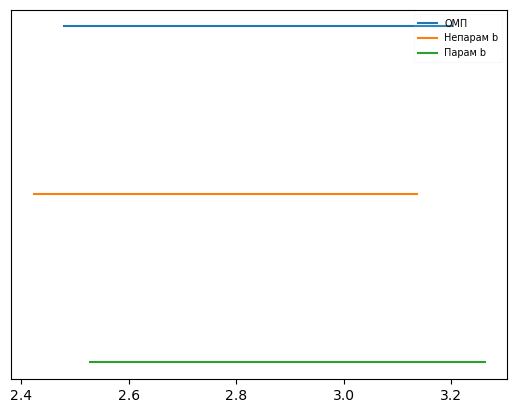

In [135]:
func_list_theta = [ConfidenceIntervalAsymptoticTheta, BootstrapNotParametricTheta,  BootstrapParametricTheta ]
names_list_theta = ['ОМП', 'Непарам b', 'Парам b']
Compare(generated, func_list_theta, names_list_theta)

### Сравнение доверительных интервалов для медианы 

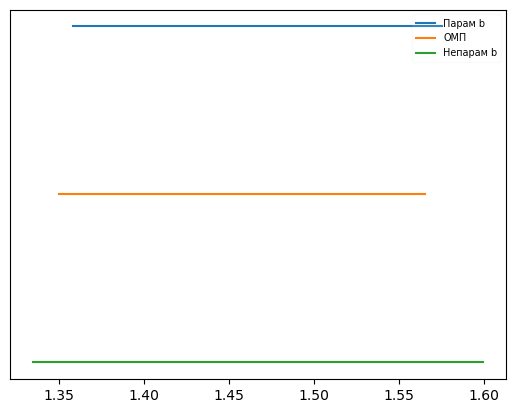

In [136]:
func_list_median = [ BootstrapParametricMedian, ConfidenceIntervalAsymptoticMedian, BootstrapNonParametricMedian]
names_list_median = ['Парам b', 'ОМП', 'Непарам b']
Compare(generated, func_list_median, names_list_median)